Integrantes: Guadalupe Sosa Ferro y Florencia Denisse Costa

Usando PCA

# Install, importar librerías y montar Drive

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar datos

In [ ]:
datos = pd.read_excel("/content/data_BreastCancerCoimbra.xlsx")
# Se cargan los datos del archivo excel utilizando Pandas
# Se guardan en un DataFrame

In [ ]:
datos

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


# Preprocesamiento

## Variables

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB



*   Edad [años]: **cuantitativa discreta**.

*   BMI (Índice de masa corporal) [kg/m^2]: medida de la grasa corporal en base a la altura y el peso que aplica en hombres y mujeres adultos.
 masa [kg]/ altura[m]^2. **Cuantitativa continua**.

*   Glucosa [mg/dL]: azúcar en sangre. **Cuantitativa discreta**.

*   Insulina [µU/mL](micro-international units per milliliter): Hormona liberada por el páncreas como respuesta de la presencia de glucosa en la sangre. Permite que la glucosa ingrese a las células. **Cuantitativa continua**.

*   HOMA (*Homeostatic model assessment of insulin resistance*): medida indirecta de cuánta insulina debe producir el páncreas para controlar el nivel de glucosa. Se calcula usando los valores de glucosa (mg/dL) e insulina (µU/L). Mientras más alto sea, mayor resistencia a la insulina.
(Glucosa * Insulina) /405
Variable **cuantitativa continua**.

*   Leptina [ng/mL]: Hormona que regula el equilibrio entre las calorías obtenidas en la ingesta de alimentos y las empleadas para producir energía. Regula el hambre al proveer una sensación de saciedad. Variable **cuantitativa continua**.

*   Adiponectina [µg/mL]: Hormona sintetizada por el tejido adiposo que participa en el metabolismo de la glucosa y los ácidos grasos. Valores bajos están asociados con varisa condiciones como obesidad, diabetes tipo 2. Variable **cuantitativa continua**.

*   Resistina [ng/mL]: Es una hormona adipoquina, asociado con la obesidad y la inflamación. Su papel exacto en la resistencia a la insulina y la diabetes en la población general es aún controversial, en parte debido al escaso conocimiento que se tiene acerca de dicha hormona. Se encontró que este polipéptido se sobreexpresa en modelos experimentales de ratones obesos e insulinorresistentes y su expresión disminuye bajo el tratamiento con fármacos sensibilizantes, sugiriendo que la hormona sirve como vínculo entre la obesidad y la diabetes, contribuyendo notablemente con la insulinorresistencia (Steppan y col., 2001) y convirtiendo esta molécula en un tópico de interés en los estudios de la diabetes. **Variable cuantitativa continua.**

*   MCP.1 [pg/dL]: Proteína prinicipalmente producida por células endoteliales y macrófagos. Recluta células del sistema inmune a los sitios de inflamación. Su secreción aumenta en pacientes obesos y su sobreexpresión disminuye la captación de glucosa estimualda por al insulina. **Variable cuantitativa continua.**

*   Clasificación: **Variable categórica**. Toma el valor de 1 para indicar que se trata de un control sano, y 2 indica que el paciente padece de cáncer de mama. (Explicar relación con insulina, glucosa...)



## Búsqueda de duplicados y faltantes

No hay datos duplicados ni faltantes en el dataset.

In [ ]:
# Verificar si hay duplicados en el DataFrame
duplicados = datos.duplicated().any()

# Verificar si hay datos faltantes en el DataFrame
faltantes = datos.isnull().any()

print("Datos duplicados:", duplicados)
print("Datos faltantes: \n", faltantes)

Datos duplicados: False
Datos faltantes: 
 Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool


## Reemplazar valores de clasificación

In [ ]:
datos['Classification'] = datos['Classification'].replace(1, 0)
datos['Classification'] = datos['Classification'].replace(2, 1)

In [ ]:
datos

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


# Análisis univariado

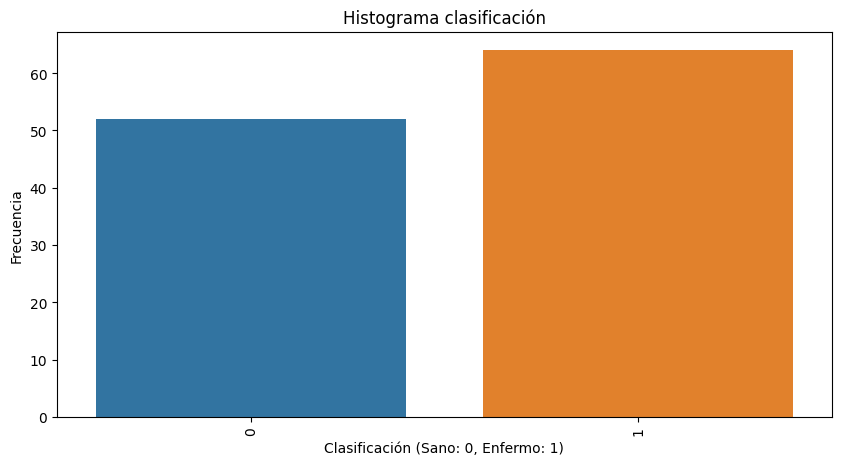

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=datos, x="Classification")
plt.title("Histograma clasificación")
plt.xlabel("Clasificación (Sano: 0, Enfermo: 1)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

## Clasificación vs Edad

Se observa que el promedio de edad es similar en ambos casos, por lo que a priori no parecería ser una variable significativa.

In [ ]:
df_0=datos[datos["Classification"]==0]
promedio_0=df_0["Age"].mean()

df_1=datos[datos["Classification"]==1]
promedio_1=df_1["Age"].mean()

print(f"El promedio de edad de pacientes sanos es {np.round(promedio_0,2)}")
print(f"El promedio de edad de pacientes enfermos es {np.round(promedio_1,2)}")

El promedio de edad de pacientes sanos es 58.08
El promedio de edad de pacientes enfermos es 56.67


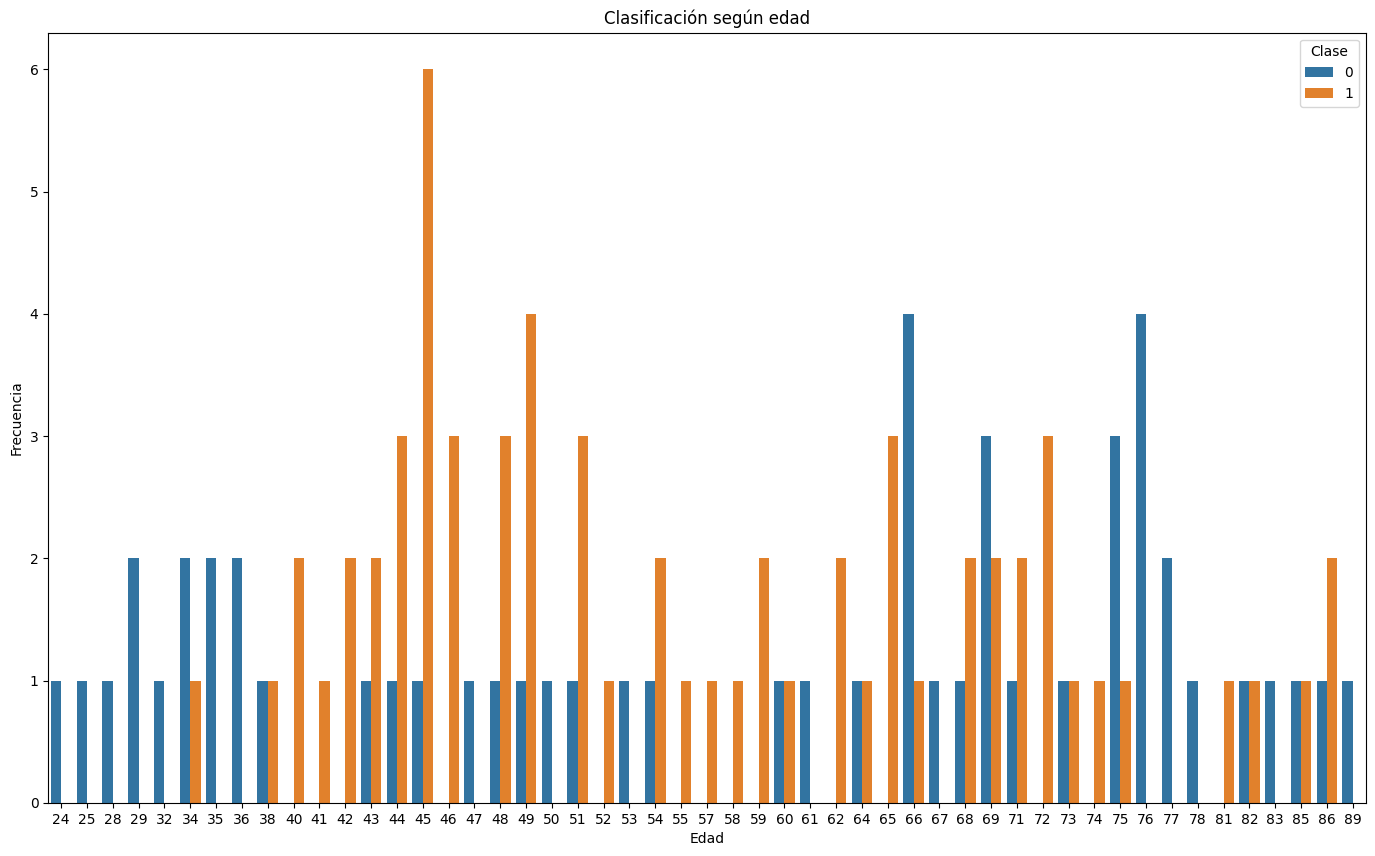

In [ ]:
# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(17, 10))
sns.countplot(x="Age", hue="Classification", data=datos.sort_values('Age'))

# Ajustar la leyenda
leyenda= plt.legend()
leyenda.set_title("Clase")
plt.title("Clasificación según edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

## Correlación entre variables

A continuación se realiza la matriz de Correlación de Pearson (r) para todas las varibles.

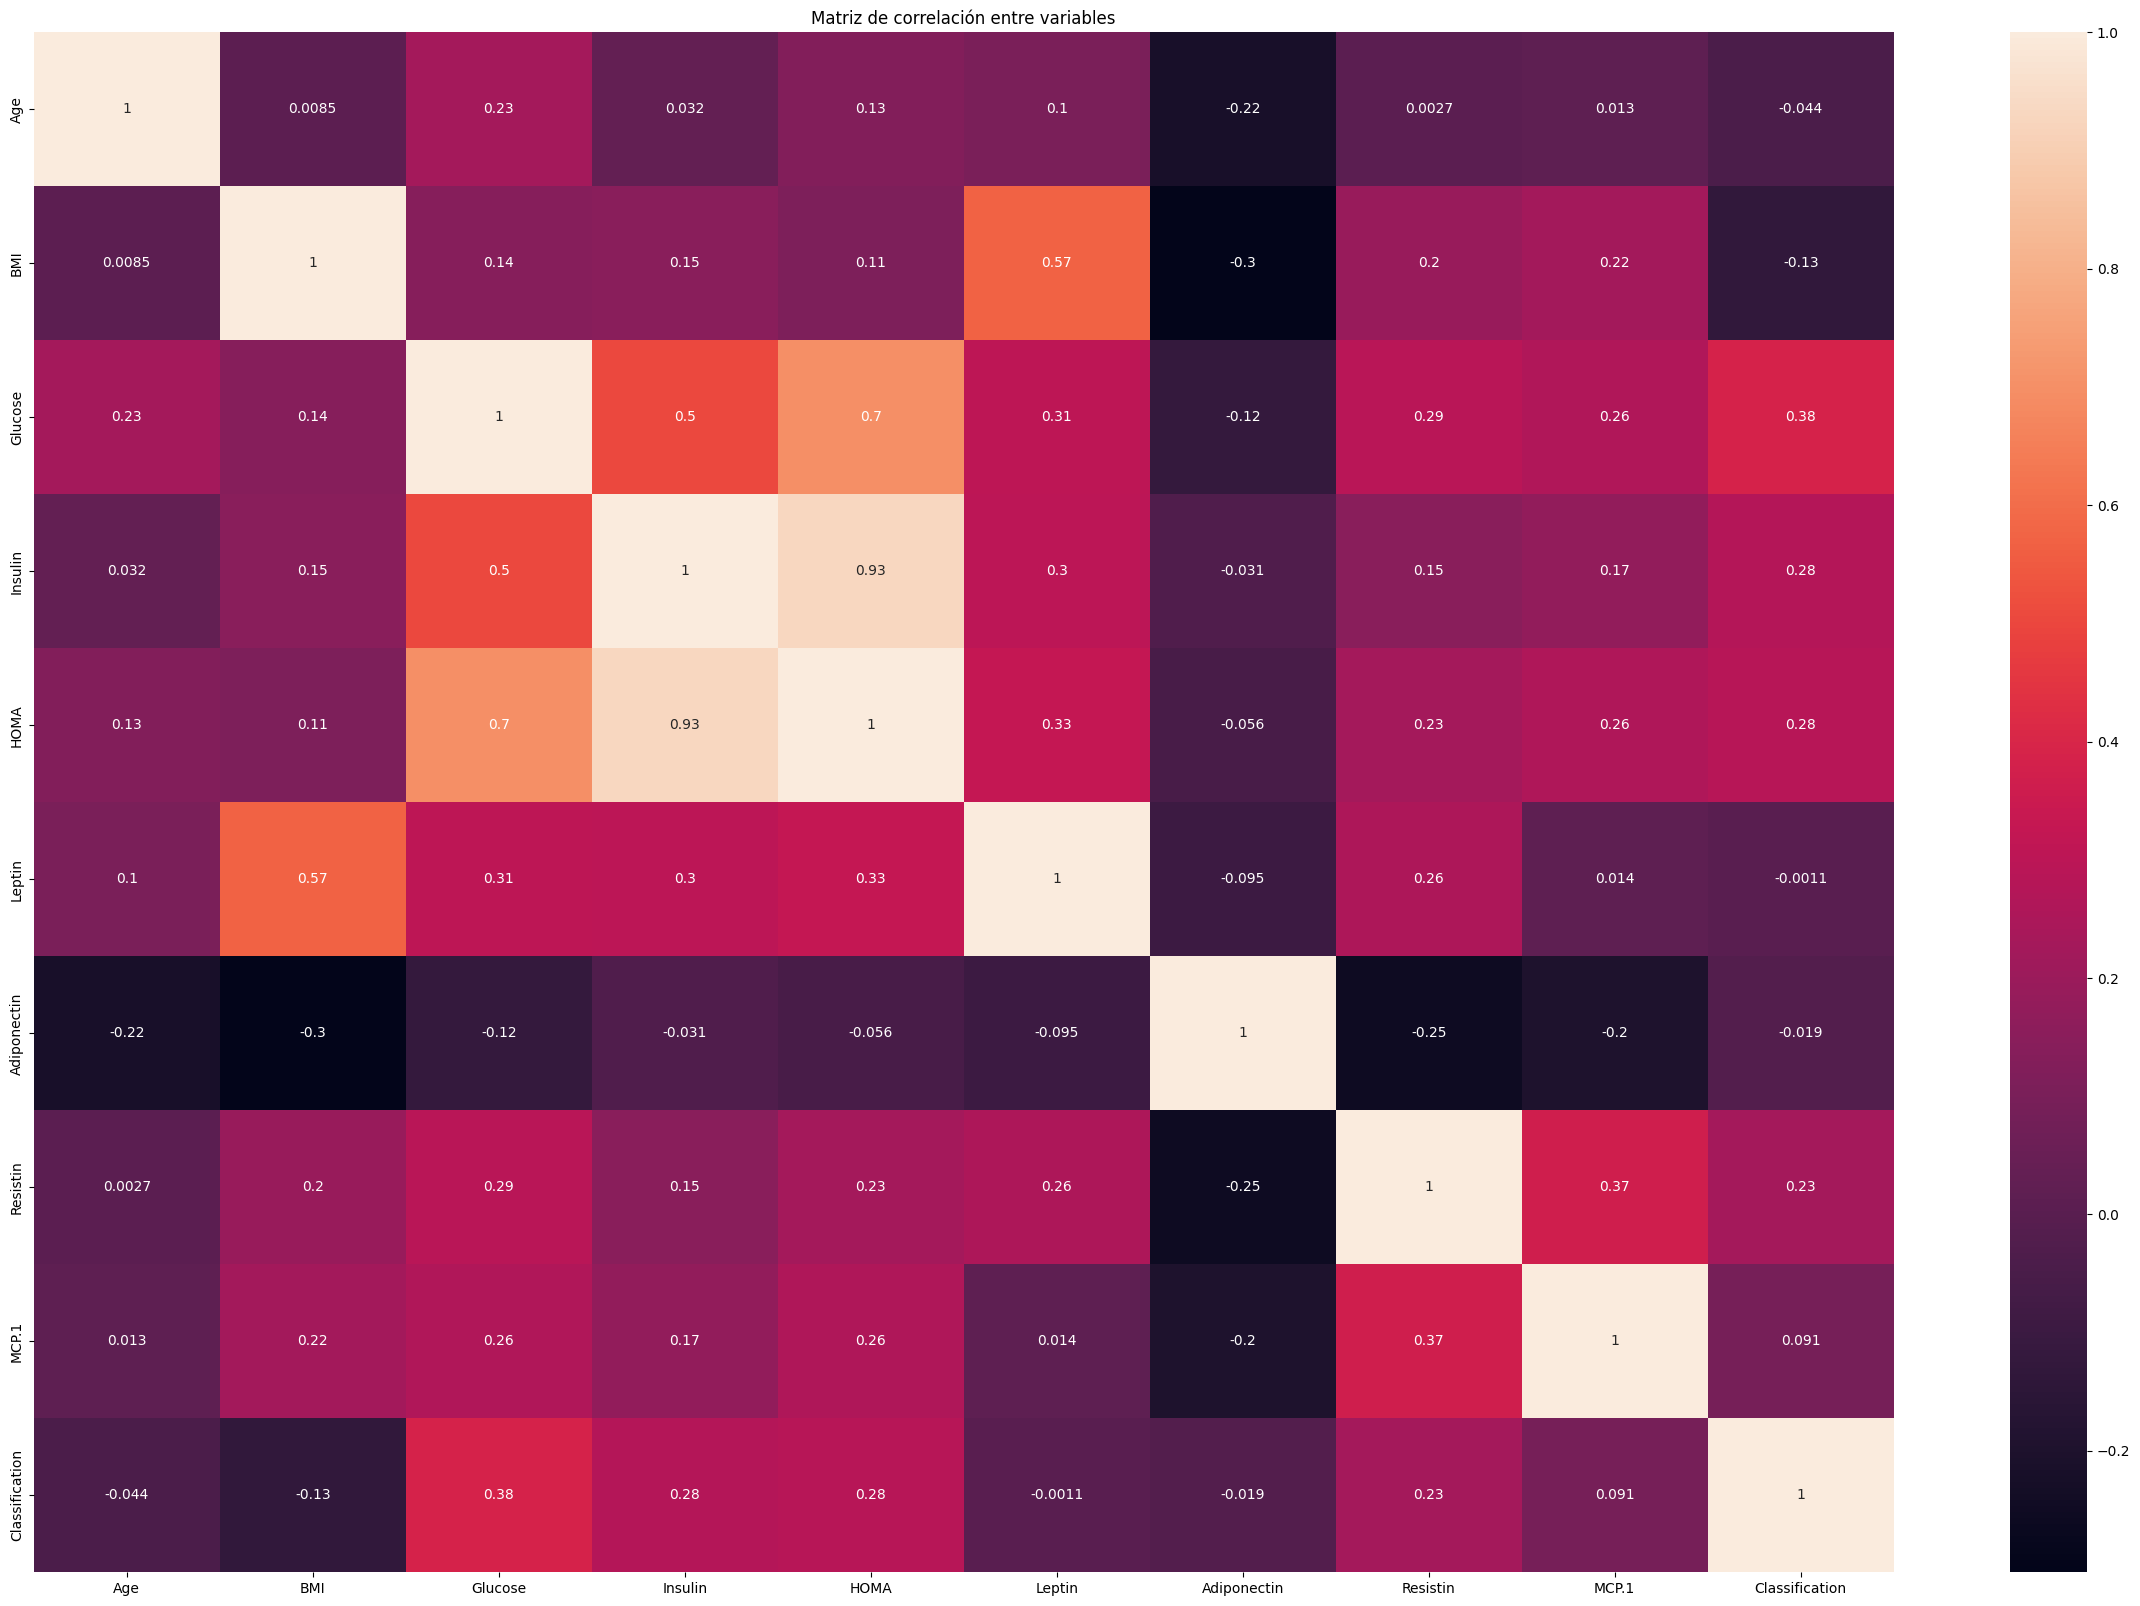

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(data = datos.corr(),annot=True)
plt.title("Matriz de correlación entre variables")
plt.show()

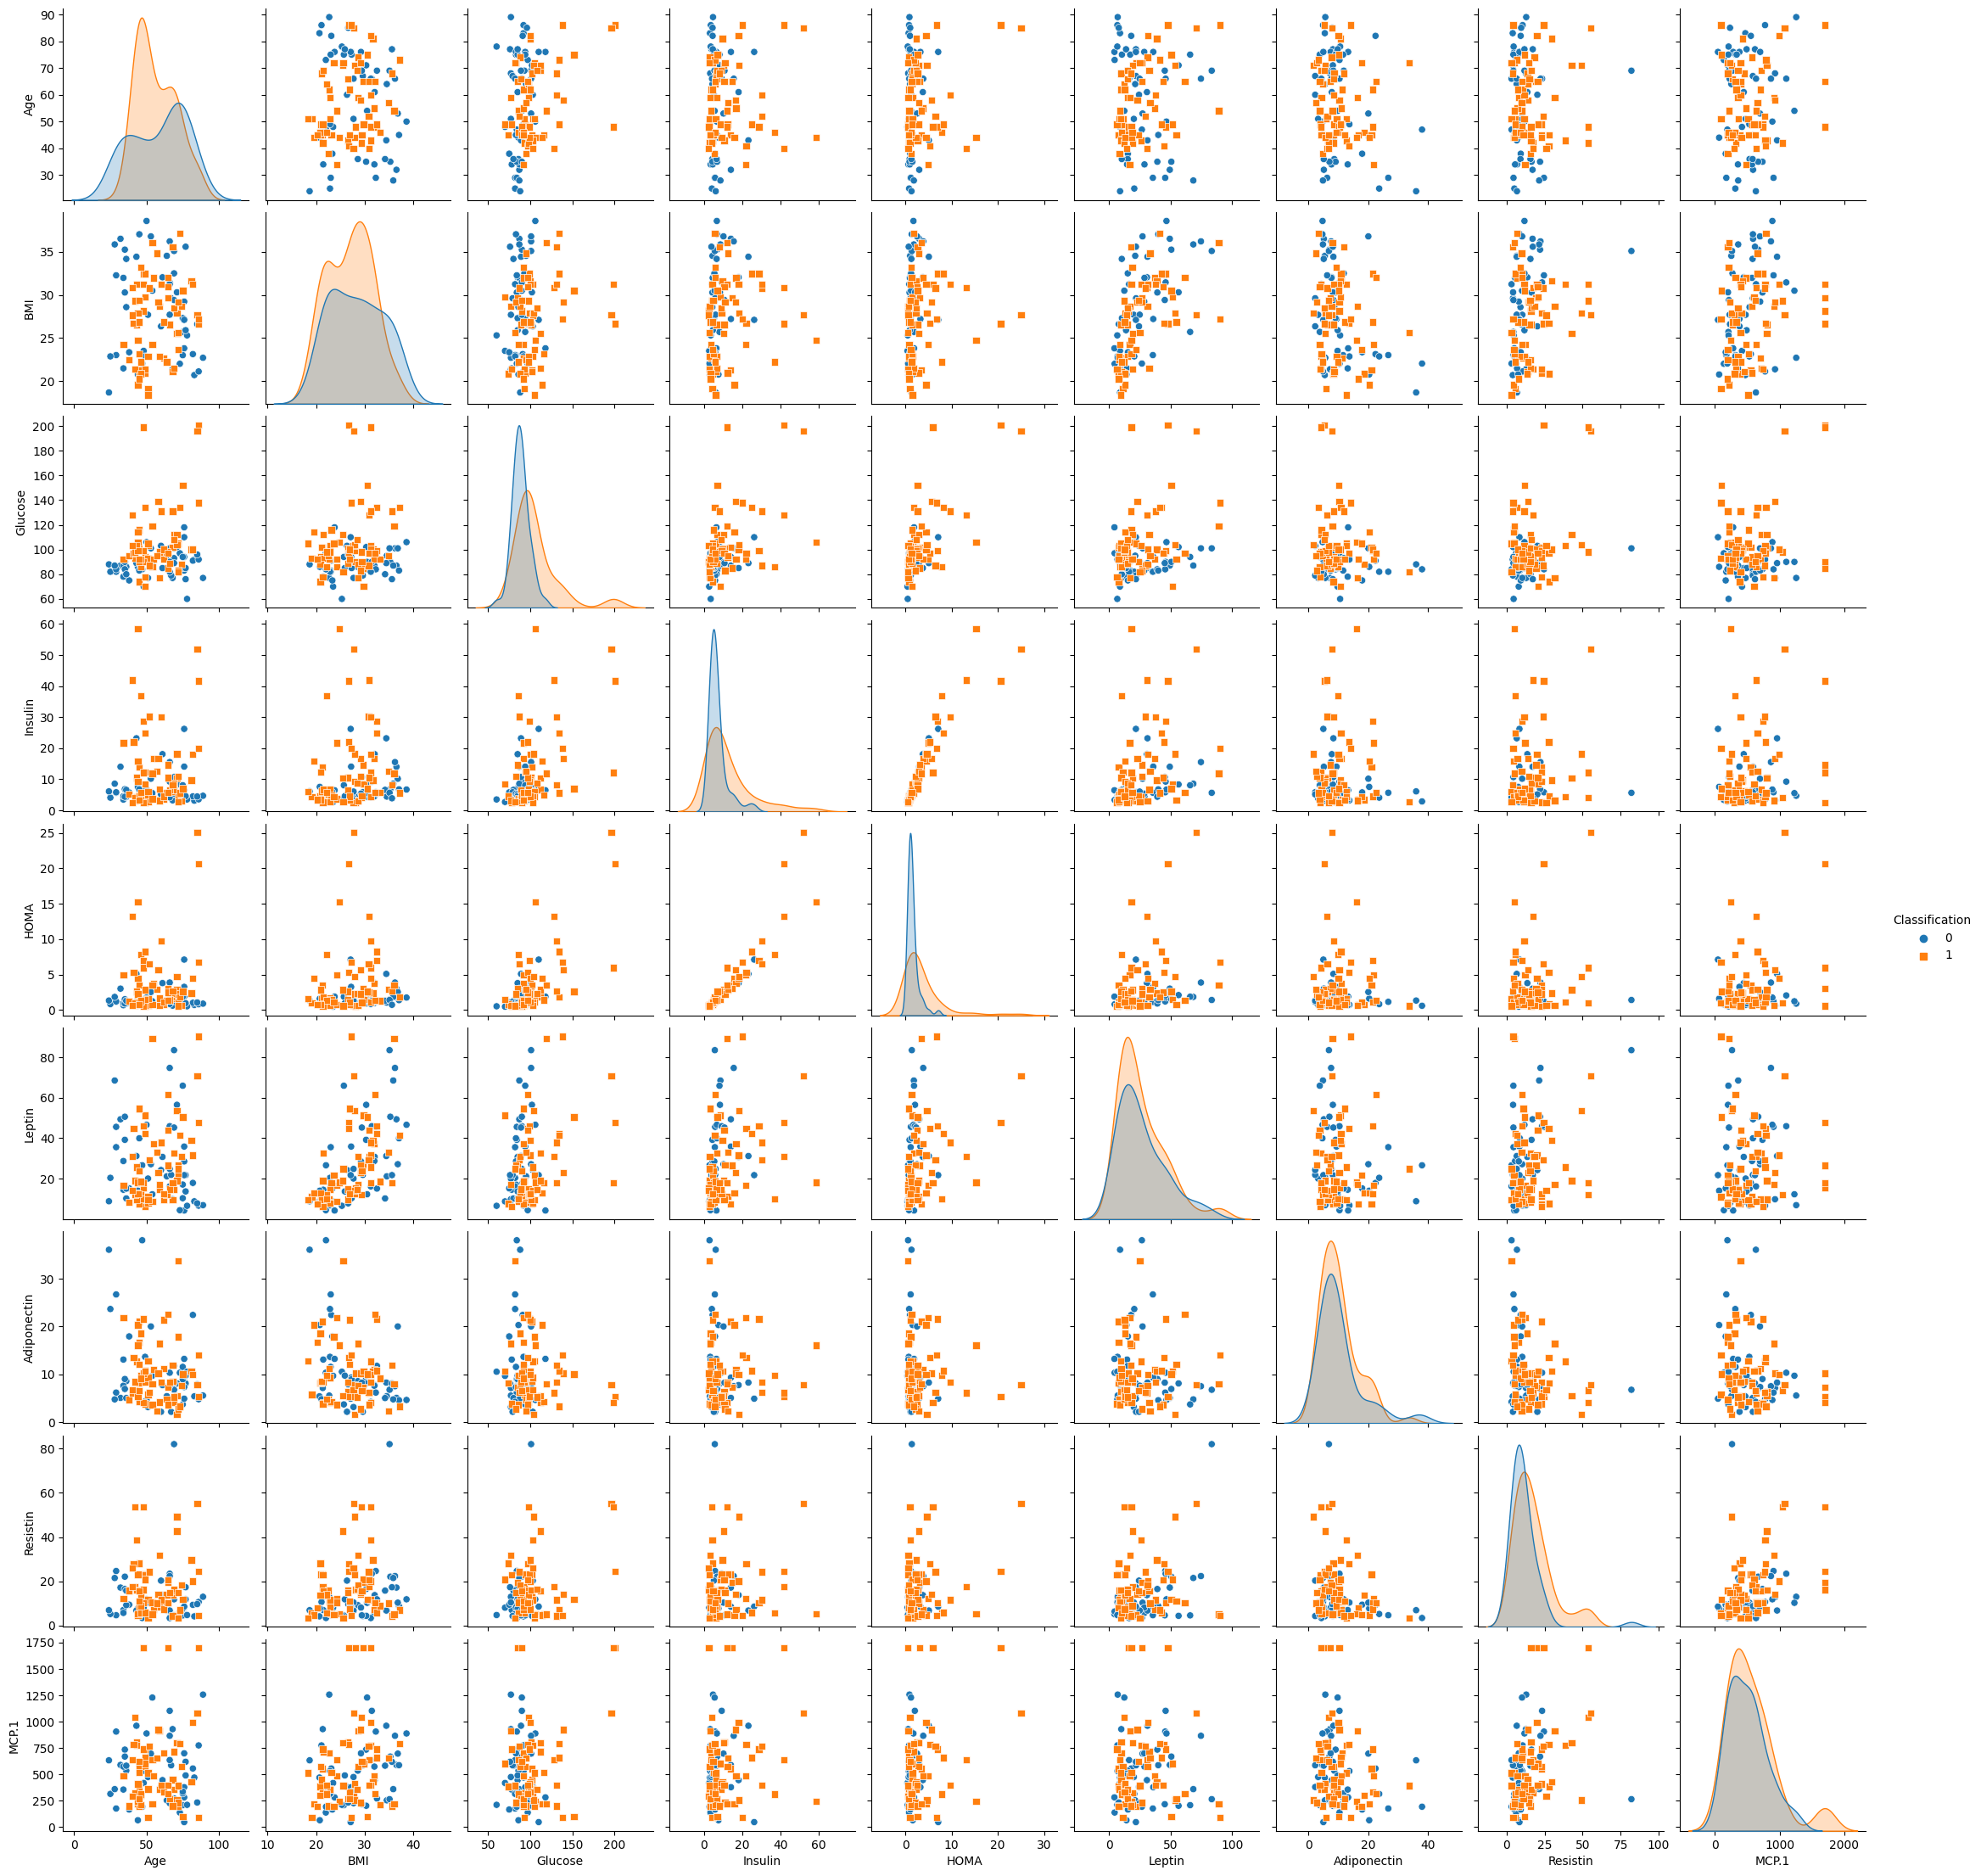

In [ ]:
sns.pairplot(datos, hue="Classification", markers=["o", "s"])
plt.show()

A partir de la matriz y los gráficos anteriores podemos ver que las variables glucosa, insulina, HOMA, resistina y BMI tienen la mayor correlación muestral respecto a la variable clase.

Por otro lado, las parejas de variables HOMA-insulina, HOMA-glucosa, glucosa-insulina y BMI-leptina tienen una gran correlación.
El valor alto obtenido en la correlación HOMA-insulina y HOMA-glucosa tiene sentido dado que el valor de HOMA se calcula a partir de la multiplicación entre ambas variables mencioandas. Por otro lado, la gran correlación entre glucosa-insulina se debe a que la secreción de insulina depende de la presencia de glucosa.
El valor alto obtenido en la correlación entre la leptina y BMI es esperado dado a que el nivel de leptina en la sangre está directamente relacionado con la grasa corporal. Se decidió descartar la variable leptina por su baja correlación respecto a la clase.

Se puede notar que el resto de las variables tienen una baja correlación con la clasificación y poca diferencia entre las curvas de distribución de cada clase. A excepción de la variable edad, donde se ve una gran diferencia.

## Boxplot edad

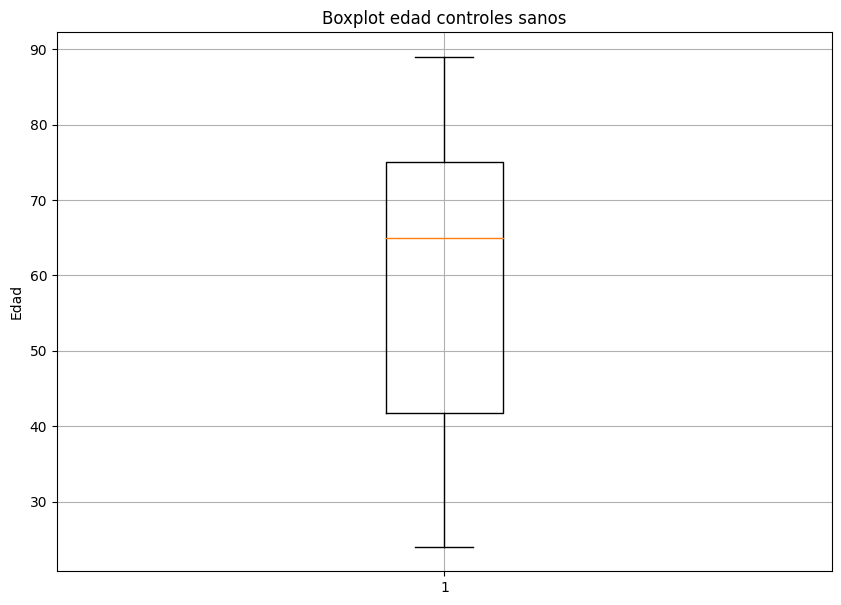

In [ ]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(df_0["Age"])
plt.title("Boxplot edad controles sanos")
plt.ylabel("Edad")
plt.grid()
plt.show()

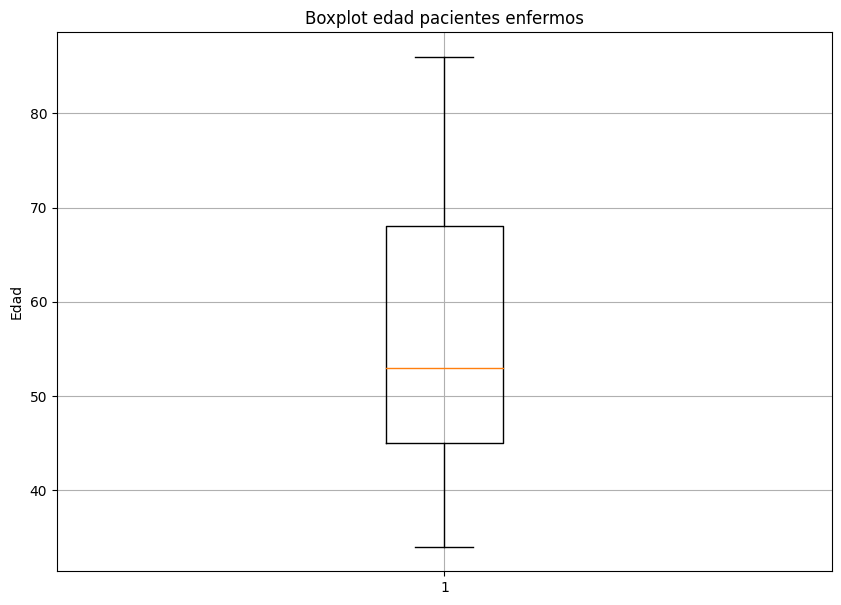

In [ ]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(df_1["Age"])
plt.title("Boxplot edad pacientes enfermos")
plt.ylabel("Edad")
plt.grid()
plt.show()

## Correlación HOMA - Insulina, HOMA - Glucosa y Glucosa - Insulina

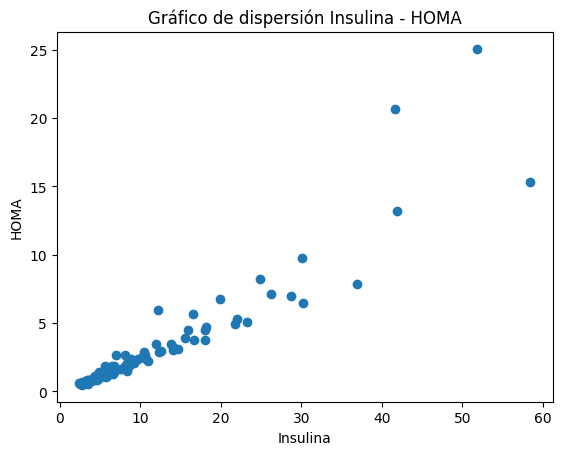

In [ ]:
plt.scatter(datos["Insulin"], datos["HOMA"])
plt.title('Gráfico de dispersión Insulina - HOMA')
plt.xlabel('Insulina')
plt.ylabel('HOMA')
plt.show()

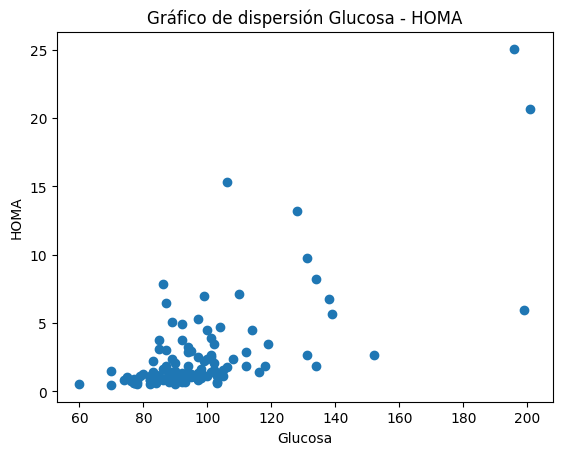

In [ ]:
plt.scatter(datos["Glucose"], datos["HOMA"])
plt.title('Gráfico de dispersión Glucosa - HOMA')
plt.xlabel('Glucosa')
plt.ylabel('HOMA')
plt.show()

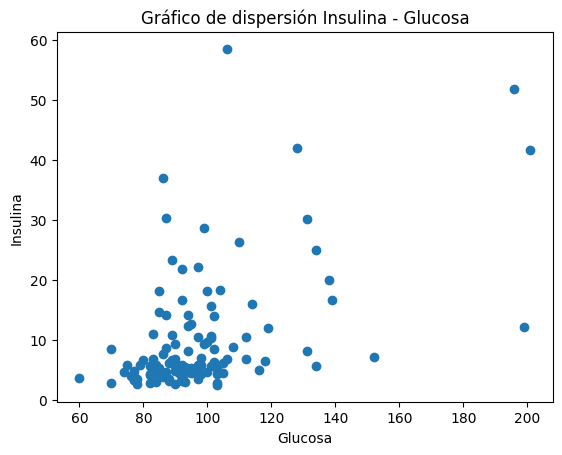

In [ ]:
plt.scatter(datos["Glucose"], datos["Insulin"])
plt.title('Gráfico de dispersión Insulina - Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Insulina')
plt.show()

A partir de los gráficos anteriores, se observa que hay una gran correlación positiva entre HOMA e insulina. Por lo cual se podría pensar que se puede utilizar una de estas dos variables en vez de ambas.

A su vez, la glucosa tiene una correlación alta con la insulina y con el HOMA. Y de las tres, es la que tiene la mayor correlación respecto a la clasificación. Por ende, se podría utilizar sólo la variable glucosa.

Dado que el valor de HOMA depende directamente de los valores de glucosa e insulina, podría considerarse redundante su inclusión en las variables del modelo.

Por lo tanto se podrían utilizar las variables: glucosa, insulina, resistina y BMI.

## Correlación BMI - Leptina

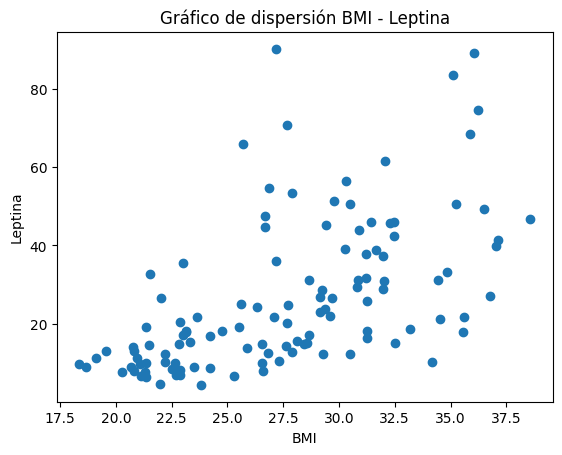

In [ ]:
plt.scatter(datos["BMI"], datos["Leptin"])
plt.title('Gráfico de dispersión BMI - Leptina')
plt.xlabel('BMI')
plt.ylabel('Leptina')
plt.show()

## Varianza

In [ ]:
varianza_variables = datos.var()

In [ ]:
varianza_variables

Age                  259.621214
BMI                   25.201763
Glucose              507.382909
Insulin              101.359945
HOMA                  13.264479
Leptin               367.998771
Adiponectin           46.831322
Resistin             153.528100
MCP.1             119655.570601
Classification         0.249475
dtype: float64

# División de datos

In [ ]:
X=datos.drop("Classification", 1)
y=datos["Classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Estandarización

In [ ]:
estandar = StandardScaler()
X_train = estandar.fit_transform(X_train)
X_test = estandar.transform(X_test)

# PCA

Para aplicar la técnica de PCA utilizando la librería Sklearn, primero debemos ajustar el modelo a los datos del subconjunto de entrenamiento. Luego se aplica este mismo modelo a los datos de prueba.

En primer lugar aplicamos PCA sin especificar la cantidad de componentes deseados, lo cual nos devolverá 9 componentes principales en este caso (número de variables - 1)

In [ ]:
pca = PCA()
X_train_n = pca.fit_transform(X_train)
X_test_n = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.32341379 0.17185163 0.13743815 0.12244576 0.08187918 0.0693094
 0.05692274 0.03272105 0.00401831]


In [ ]:
pca.components_

array([[ 0.09195755,  0.24969356,  0.43429245,  0.46141667,  0.50870078,
         0.33990516, -0.09770453,  0.3079646 ,  0.22131718],
       [-0.22355288, -0.42651561,  0.08439539,  0.38089845,  0.34047485,
        -0.17766942,  0.57020931, -0.27769906, -0.25721074],
       [-0.37506192,  0.51683484, -0.19426138,  0.0050309 , -0.09263783,
         0.56417679,  0.2481183 , -0.16334891, -0.37326228],
       [ 0.70113196, -0.07725635,  0.09730738,  0.03003571,  0.06016221,
         0.20795049, -0.19448254, -0.32459364, -0.54956999],
       [ 0.02514663, -0.32777136,  0.20599508, -0.2869881 , -0.13855565,
         0.22639304,  0.26933958,  0.71047355, -0.34549891],
       [ 0.50355462,  0.16199452, -0.04855038, -0.13632118, -0.10431194,
         0.1273942 ,  0.68044965, -0.0844077 ,  0.44944774],
       [-0.1887421 ,  0.10846762,  0.82448261, -0.3589544 , -0.1489293 ,
        -0.06469279,  0.03590064, -0.34060688,  0.01801014],
       [ 0.13577253,  0.57837457,  0.05252122,  0.08113466,  0

In [ ]:
pesos_caracteristicas = pca.components_

# Obtener las variables que contribuyen más a cada componente principal
for i, componente in enumerate(pesos_caracteristicas):
  variables_contribuyentes = datos.columns[np.abs(componente).argsort()[::-1]]
  print(f"Variables más importantes para el componente principal {i+1}: {variables_contribuyentes}")

Variables más importantes para el componente principal 1: Index(['HOMA', 'Insulin', 'Glucose', 'Leptin', 'Resistin', 'BMI', 'MCP.1',
       'Adiponectin', 'Age'],
      dtype='object')
Variables más importantes para el componente principal 2: Index(['Adiponectin', 'BMI', 'Insulin', 'HOMA', 'Resistin', 'MCP.1', 'Age',
       'Leptin', 'Glucose'],
      dtype='object')
Variables más importantes para el componente principal 3: Index(['Leptin', 'BMI', 'Age', 'MCP.1', 'Adiponectin', 'Glucose', 'Resistin',
       'HOMA', 'Insulin'],
      dtype='object')
Variables más importantes para el componente principal 4: Index(['Age', 'MCP.1', 'Resistin', 'Leptin', 'Adiponectin', 'Glucose', 'BMI',
       'HOMA', 'Insulin'],
      dtype='object')
Variables más importantes para el componente principal 5: Index(['Resistin', 'MCP.1', 'BMI', 'Insulin', 'Adiponectin', 'Leptin',
       'Glucose', 'HOMA', 'Age'],
      dtype='object')
Variables más importantes para el componente principal 6: Index(['Adiponect

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

In [ ]:
labels

{'0': 'PC 1 (32.3%)',
 '1': 'PC 2 (17.2%)',
 '2': 'PC 3 (13.7%)',
 '3': 'PC 4 (12.2%)',
 '4': 'PC 5 (8.2%)',
 '5': 'PC 6 (6.9%)',
 '6': 'PC 7 (5.7%)',
 '7': 'PC 8 (3.3%)',
 '8': 'PC 9 (0.4%)'}

In [ ]:
column_names= [f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)]
# Crear el DataFrame
df = pd.DataFrame(X_train_n, columns=column_names)

In [ ]:
df["Classification"]=y_train.values

In [ ]:
df

,PC 1 (32.3%),PC 2 (17.2%),PC 3 (13.7%),PC 4 (12.2%),PC 5 (8.2%),PC 6 (6.9%),PC 7 (5.7%),PC 8 (3.3%),PC 9 (0.4%),Classification
0,3.787401,4.992357,0.020055,0.250254,-1.915952,-1.408764,-1.797538,0.710484,-0.489049,1
1,-0.722932,-0.453354,0.028354,-0.803428,0.913756,-1.237198,0.517289,0.583191,0.047709,1
2,-0.650399,0.028465,1.523127,0.073152,0.726394,-0.180944,0.276023,-0.947387,0.084785,1
3,-0.448172,-1.187849,-0.254583,0.480186,0.236353,0.561451,-0.293623,-0.033947,0.063629,1
4,-1.674515,0.580755,-0.998618,1.286734,0.366535,-0.138501,0.295026,0.401953,0.021151,0
...,...,...,...,...,...,...,...,...,...,...
87,-1.198565,1.186752,0.168572,0.114145,0.426511,1.184745,0.607711,0.745681,0.034433,1
88,-0.894271,-0.113801,-1.195258,0.516845,0.229559,-0.720827,0.079049,-0.164790,-0.039652,1
89,-0.898778,0.064174,-0.842669,0.557088,-0.133163,-0.951373,0.230468,-0.297856,-0.023341,1
90,-2.210862,0.031682,-0.426168,1.215254,-0.326530,0.371884,-1.054025,0.561203,0.261823,0


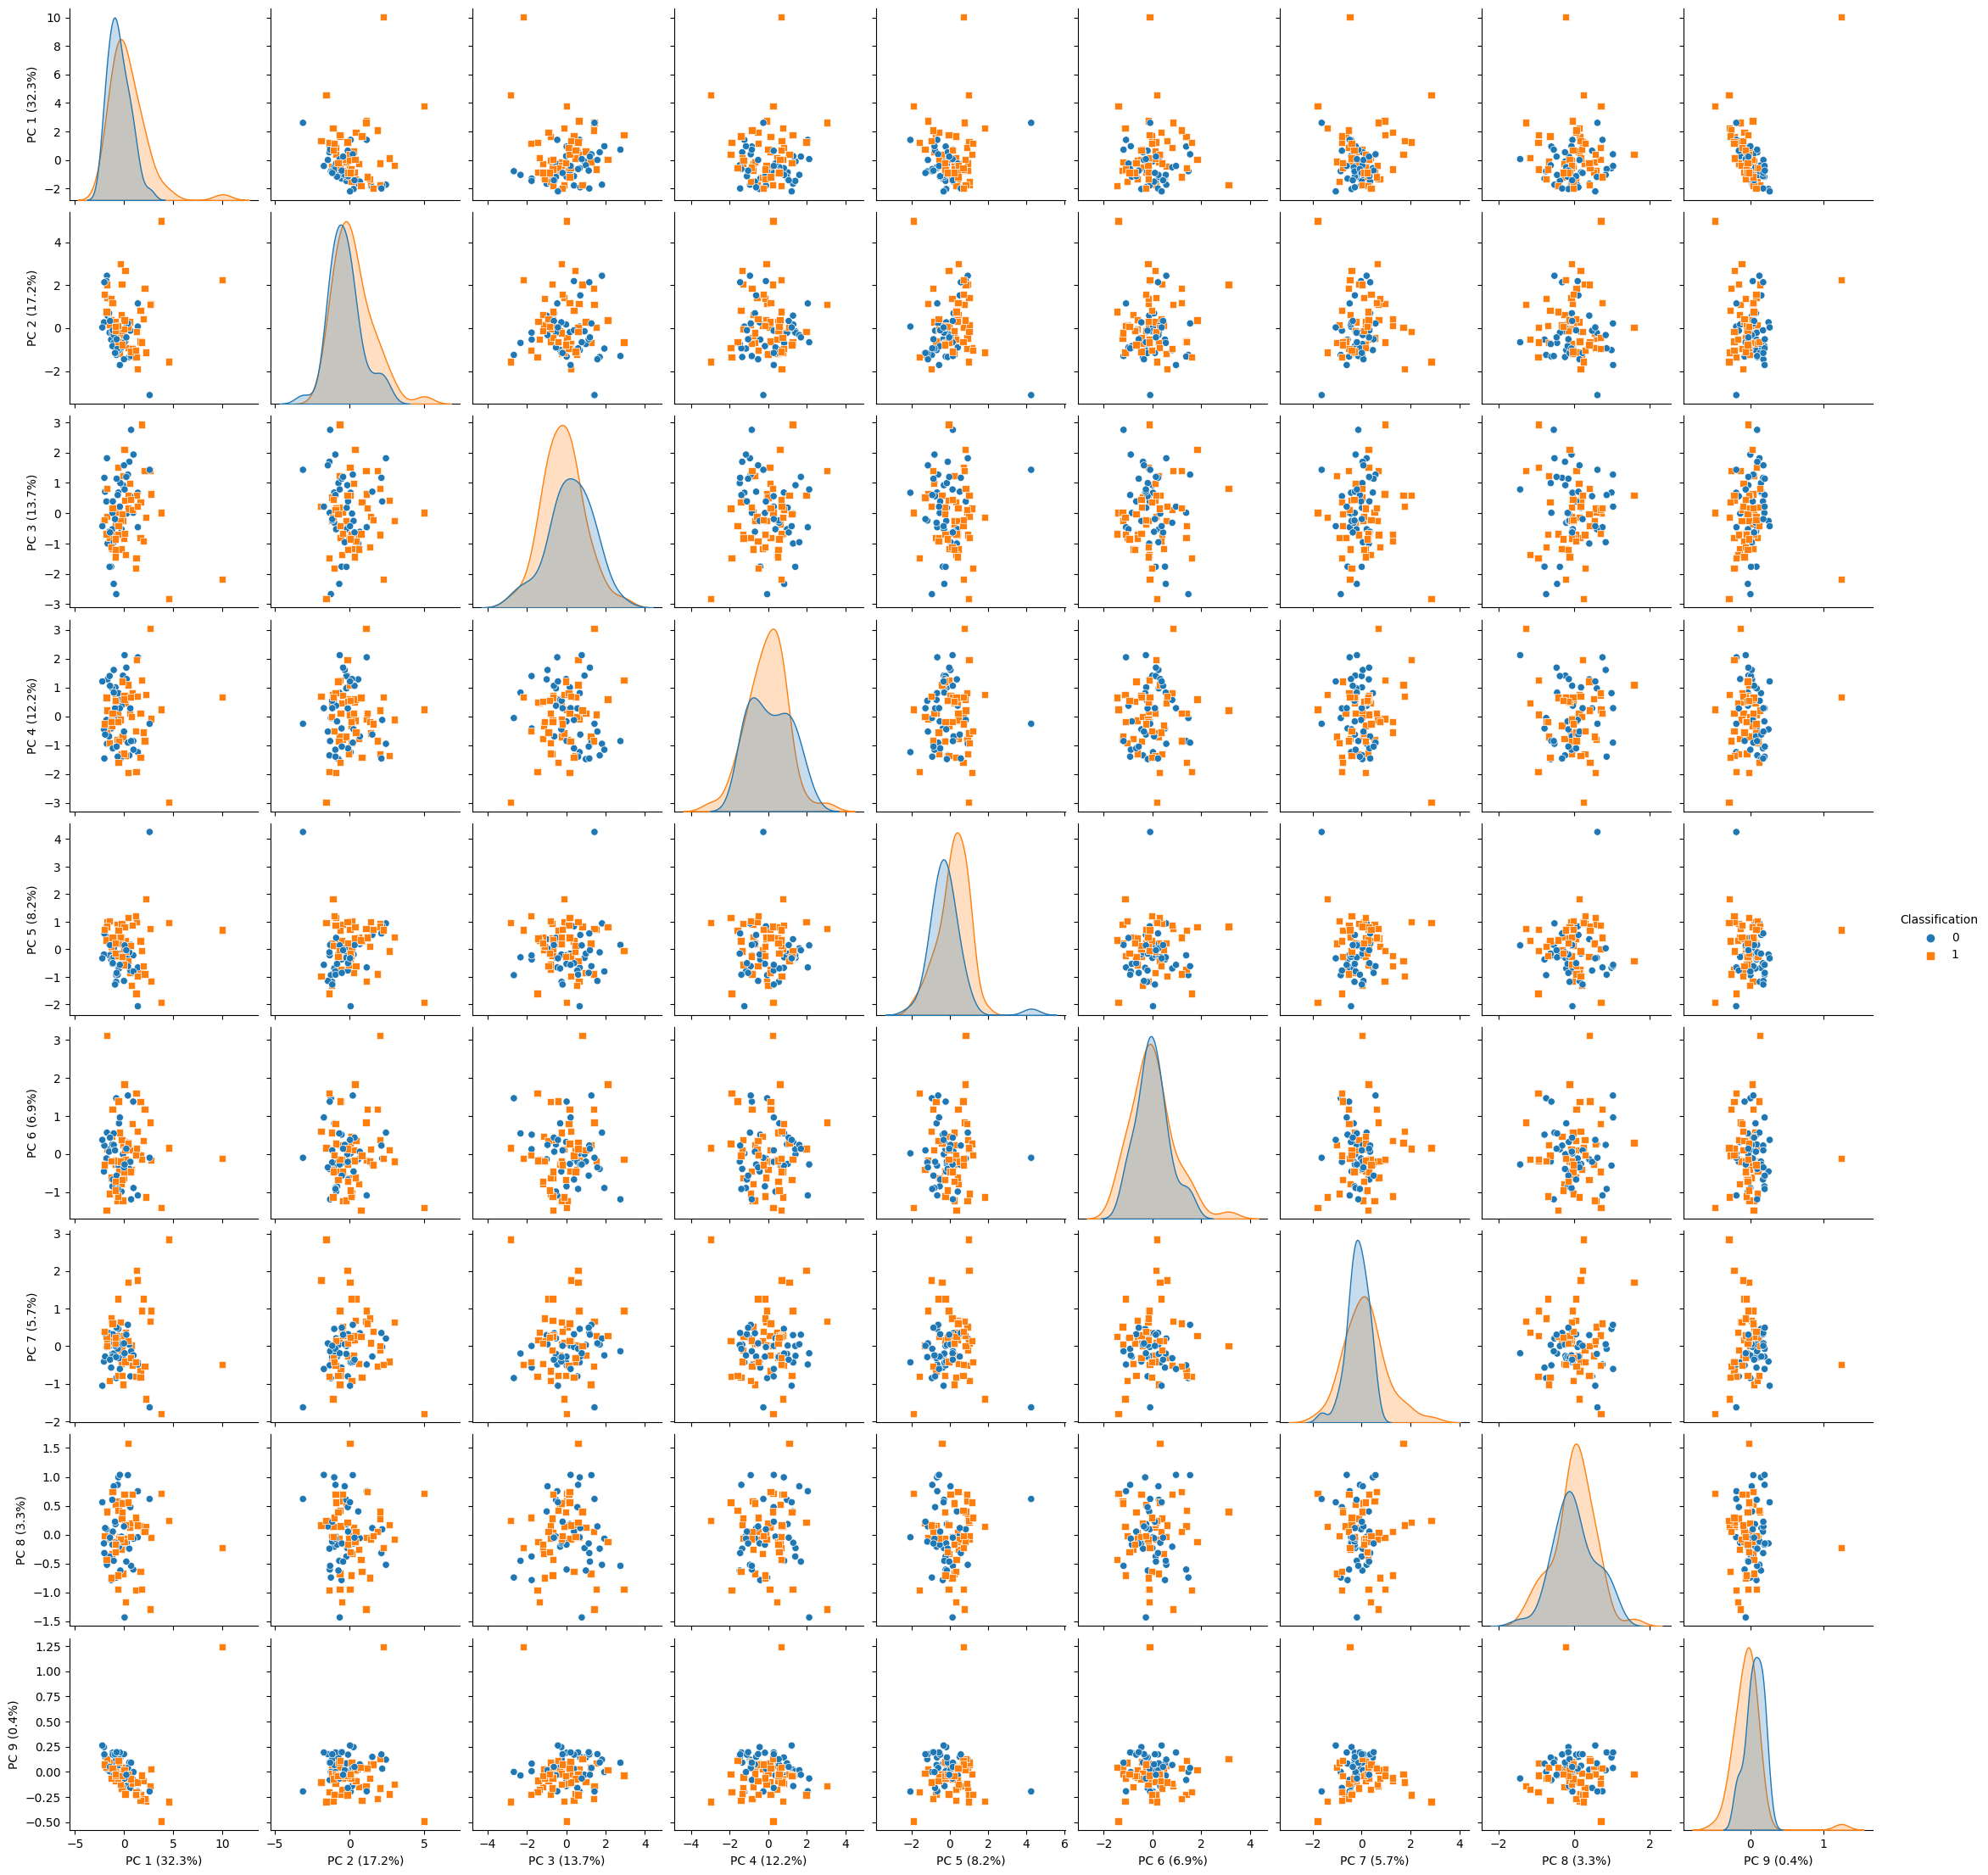

In [ ]:
sns.pairplot(df, hue="Classification", markers=["o", "s"])
plt.show()


## Varianza según cantidad de componentes

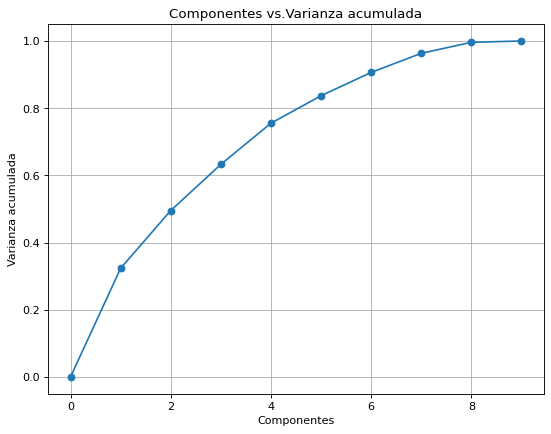

In [ ]:
nums = np.arange(10)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_train)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(8,6),dpi=80)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('Componentes')
plt.ylabel('Varianza acumulada')
plt.title('Componentes vs.Varianza acumulada')
plt.show()

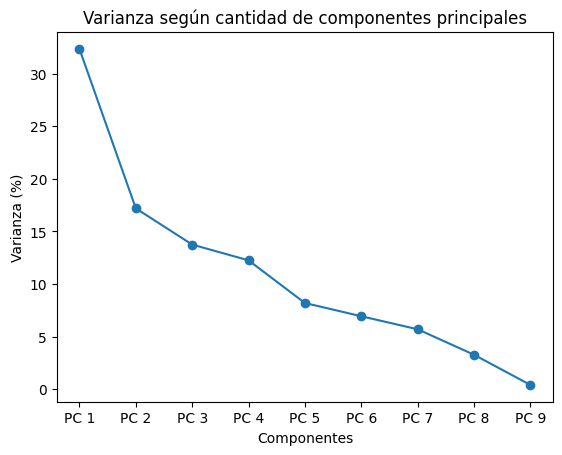

In [ ]:
nombres_componentes = [f"PC {i+1}" for i in range(len(pca.explained_variance_ratio_))]
porcentaje_varianza = list(pca.explained_variance_ratio_ * 100)

plt.plot(nombres_componentes, porcentaje_varianza, marker='o')
plt.title('Varianza según cantidad de componentes principales')
plt.xlabel('Componentes')
plt.ylabel('Varianza (%)')
plt.show()

Se puede observar que con PC7 se alcanza un nivel de varianza cercano al 95%. Generalmente se desea una varianza entre el 95% y el 99%.
A su vez, se puede confirmar con el siguiente código:


In [ ]:
pca_95 = PCA(n_components=0.95)
X_train_95 = pca_95.fit_transform(X_train)
X_test_95 = pca_95.transform(X_test)
explained_variance_95 = pca_95.explained_variance_ratio_
print("Cantidad de componentes principales necesarios para alcanzar una varianza del 95%: ",len(explained_variance_95))

Cantidad de componentes principales necesarios para alcanzar una varianza del 95%:  7


## Biplots

In [ ]:
pca_2 = PCA(n_components=2)
X_train_2 = pca_2.fit_transform(X_train)
X_test_2 = pca_2.transform(X_test)

In [ ]:
loadings = pca_2.components_.T * np.sqrt(pca_2.explained_variance_)

fig = px.scatter(X_train_2, x=0, y=1, color=df['Classification'])
color_map = {0: 'green', 1: 'red'}
fig.update_traces(marker=dict(color=[color_map[s] for s in df['Classification']]))

for i, feature in enumerate(X.columns.tolist()):
  fig.add_annotation(
    ax=0, ay=0,
    axref="x", ayref="y",
    x=loadings[i, 0],
    y=loadings[i, 1],
    showarrow=True,
    arrowsize=2,
    arrowhead=2,
    xanchor="right",
    yanchor="top"
  )
  fig.add_annotation(
    x=loadings[i, 0],
    y=loadings[i, 1],
    ax=0, ay=0,
    xanchor="center",
    yanchor="bottom",
    text=feature,
    yshift=5,
  )
fig.update_layout(
  title={'text': 'PCA Biplot', 'x': 0.5},
  xaxis_title="PC1 (32.3%)",
  yaxis_title="PC2 (17.2%)",
  showlegend=True,
  legend_title="Classification",
)

fig.show()

# AdaBoost

## GridSearch

GridSearchCV es una herramienta de la biblioteca scikit-learn de Python que se utiliza para realizar una búsqueda exhaustiva de los mejores hiperparámetros para un modelo de aprendizaje automático. Su objetivo es encontrar la combinación óptima de valores de hiperparámetros que maximicen el rendimiento del modelo. Permite explorar sistemáticamente diferentes combinaciones de hiperparámetros y evaluar el rendimiento del modelo utilizando validación cruzada. La validación cruzada es de 5 pliegues. Es decir, el conjunto de datos se divide en cinco partes o pliegues de tamaño similar. Cada pliegue se utiliza como conjunto de prueba una vez y los cuatro pliegues restantes se utilizan como conjunto de entrenamiento. Se realizan cinco iteraciones, donde en cada iteración se selecciona un pliegue diferente como conjunto de prueba y los otros cuatro pliegues se utilizan como conjunto de entrenamiento. El modelo se entrena utilizando el conjunto de entrenamiento y se evalúa su rendimiento utilizando el conjunto de prueba. Se registran los resultados de rendimiento (como precisión, exactitud, F1-score, entre otros) obtenidos en cada iteración. Al finalizar las cinco iteraciones, se promedian los resultados para obtener una medida general del rendimiento del modelo. La validación cruzada de 5 pliegues es especialmente útil cuando se tienen conjuntos de datos de tamaño moderado o pequeño.

In [ ]:
# Definir el modelo de AdaBoost
adaboost_model = AdaBoostClassifier()

# Definir los hiperparámetros y los rangos a explorar
param_grid_adaboost = {
    'n_estimators': np.linspace(50, 500, 10).astype(int),
    'learning_rate': np.linspace(0.01, 1, 10)
}

# Realizar la búsqueda de hiperparámetros
grid_search_adaboost = GridSearchCV(estimator=adaboost_model, param_grid=param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train_95, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params_adaboost = grid_search_adaboost.best_params_

# Entrenar el modelo con los mejores hiperparámetros
best_model_adaboost = AdaBoostClassifier(**best_params_adaboost)
best_model_adaboost.fit(X_train_95, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=400)

## Evaluación del modelo

Obtenemos la matriz de confusión de dicho modelo

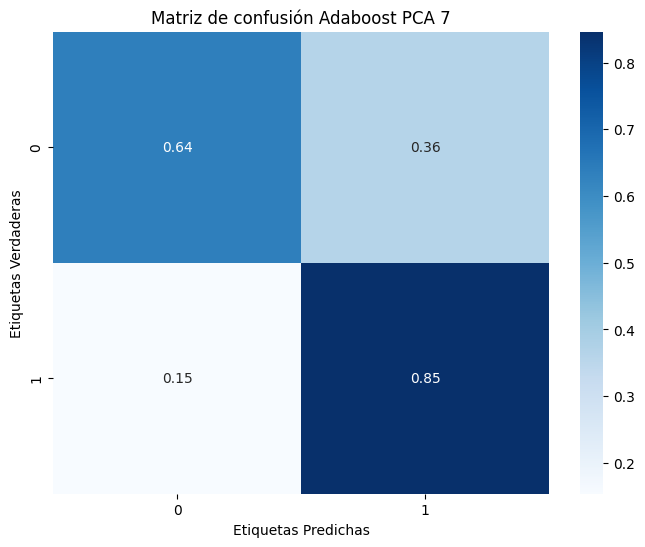

In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
best_model_adaboost = AdaBoostClassifier(n_estimators=400, learning_rate=0.01)
best_model_adaboost.fit(X_train_95, y_train)

# Calcular la matriz de confusión
y_pred_ada = best_model_adaboost.predict(X_test_95)
cm_ada = metrics.confusion_matrix(y_test, y_pred_ada, normalize="true")

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, cmap="Blues")

# Configurar los ejes
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de confusión Adaboost PCA 7")

# Mostrar el mapa de calor
plt.show()

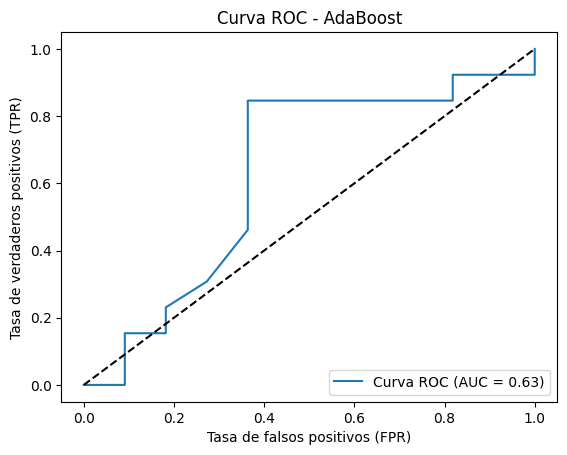

In [ ]:
# Calcula las puntuaciones de probabilidad para los datos de prueba
y_score_adaboost = best_model_adaboost.predict_proba(X_test_95)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score_adaboost)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [ ]:
report_ada = metrics.classification_report(y_test, y_pred_ada)
print(report_ada)

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.73      0.85      0.79        13

    accuracy                           0.75        24
   macro avg       0.76      0.74      0.74        24
weighted avg       0.75      0.75      0.75        24



# Random Forest

Creamos un modelo de Random Forest de profundidad 1 y con 350 árboles para compararlo con el modelo de Adaboost. Se observa que las métricas obtenidas son más bajas, lo cual tendría sentido ya que RandomForest le asigna un voto con el mismo peso a cada árbol construido, mientras que en AdaBoost cada estimador tiene un peso distinto.

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=400, max_depth=1)
classifier_rf.fit(X_train_95, y_train)
y_pred_rf = classifier_rf.predict(X_test_95)

In [ ]:
report_rf = metrics.classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.58      0.85      0.69        13

    accuracy                           0.58        24
   macro avg       0.59      0.56      0.53        24
weighted avg       0.59      0.58      0.54        24



## GridSearch

También buscamos el modelo "óptimo" de Random Forest. Para eso usamos la función GridSearch de sklearn y así encontramos los hiperparámetros óptimos. Esta arrojo que la mejor combinación era una profundidad de 2 nodos y 3 árboles para random state igual a 0.

In [ ]:
# Definir el modelo de Random Forest
rf_model = RandomForestClassifier()

# Definir los hiperparámetros y los rangos a explorar
param_grid_rf = {
    'n_estimators': np.arange(3, 21, 1).astype(int),
    'max_depth': np.arange(2, 8, 1).astype(int),
    'random_state': np.arange(0, 11, 1).astype(int)
}

# Realizar la búsqueda en cuadrícula
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_95, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params_rf = grid_search_rf.best_params_

# Entrenar el modelo con los mejores hiperparámetros
best_model_rf = RandomForestClassifier(**best_params_rf)
best_model_rf.fit(X_train_95, y_train)

RandomForestClassifier(max_depth=3, n_estimators=9, random_state=2)

## Evaluación del modelo

In [ ]:
classifier_rf_best = RandomForestClassifier(max_depth=3, n_estimators=9, random_state=2)
classifier_rf_best.fit(X_train_95, y_train)
y_pred_rf_best = classifier_rf_best.predict(X_test_95)

In [ ]:
report_rf_best = metrics.classification_report(y_test, y_pred_rf_best)
print(report_rf_best)

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.59      0.77      0.67        13

    accuracy                           0.58        24
   macro avg       0.58      0.57      0.56        24
weighted avg       0.58      0.58      0.56        24



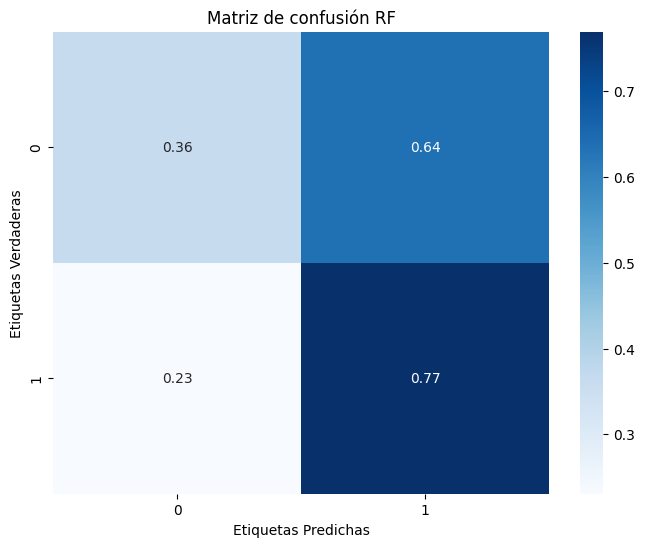

In [ ]:
cm_rf_best = metrics.confusion_matrix(y_test, y_pred_rf_best, normalize="true")

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_best, annot=True, cmap="Blues")

# Configurar los ejes
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.title("Matriz de confusión RF")

# Mostrar el mapa de calor
plt.show()

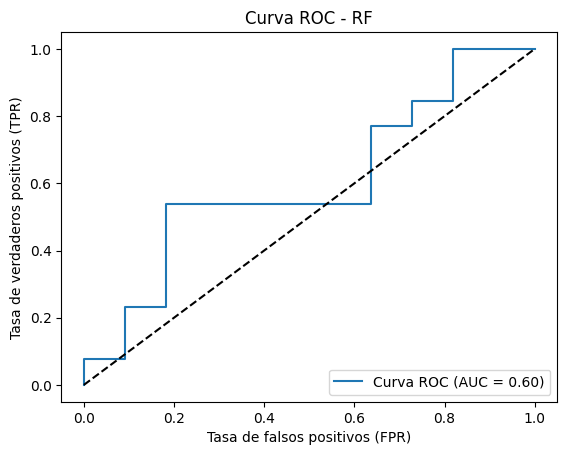

In [ ]:
# Calcula las puntuaciones de probabilidad para los datos de prueba
y_score_rf = classifier_rf_best.predict_proba(X_test_95)[:, 1]

# Calcula la curva ROC
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_score_rf)

# Calcula el área bajo la curva ROC (AUC)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

# Trazar la curva ROC
plt.plot(fpr_rf, tpr_rf, label='Curva ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - RF')
plt.legend(loc='lower right')
plt.show()